##  1.Write a function file to calculate dendrograms in Hierarchical clustering given leavesin clusters

## Hierarchical Method

In [1]:
# Importing the libraries
import pandas as pd
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


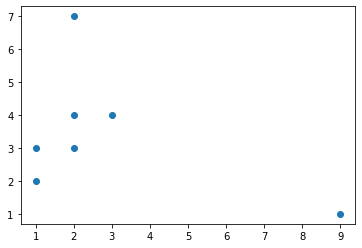

In [2]:
data = np.array([[2, 4],[2,3],[3,4],[1,2],[9,1],[2,7],[1,3]])
# Taking transpose
x, y = data.T
# plot our list in X,Y coordinates
plt.scatter(x, y)
plt.show()

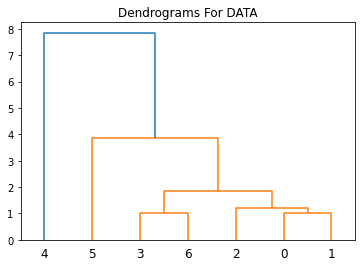

In [4]:
# Creating Dendrogram for our data
Z = hierarchy.linkage(data, method='average')
plt.figure()
plt.title("Dendrograms For DATA")
dendrogram = hierarchy.dendrogram(Z)

## 2. Use iris datasets and cluster them appropriately using K-mean and Hierarchical clustering

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import gower
df=pd.read_csv("Iris.csv")
df1=df
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df1.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df1=df.drop('Species',axis=1)
df1.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [13]:
features=list(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
print(features)
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x1=df1[features]
x1.head()

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# data preprocessing
x=pd.get_dummies(x1)
x=StandardScaler().fit_transform(x)
x1=pd.DataFrame(x1)
y=gower.gower_matrix(x1)

In [18]:
#COMPUTE DBSCAN
#(EPS) This is the least distance required for two points to be termedas a neighbor
db=DBSCAN(eps=0.4,min_samples=30,metric='precomputed').fit(y)
core_sample_mask=np.zeros_like(db.labels_,dtype=bool)
labels=db.labels_
#no of clusters in labels if noise ignore
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
n_noise=list(labels).count(-1)
x1['anomly']=labels
outliers=x1.loc[x1['anomly']==-1]
x2=pd.concat([df['Species'],df1[features],pd.DataFrame({'Clusters':labels})],axis=1)
print( n_clusters_)
print(n_noise)


1
0


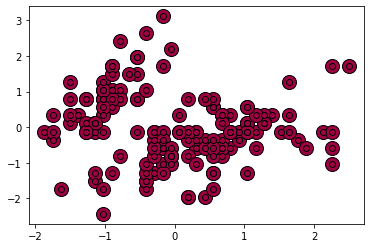

In [21]:
# plot result
import matplotlib.pyplot as plt
#block removed and is used for noise instead
unique_labels=set(labels)
colors=[plt.cm.Spectral(each)
 for each in np.linspace(0,1, len(unique_labels))]
for k,col in zip(unique_labels,colors):
 if k==-1:
     col=[0,0,0,1]
 
 class_member_mask=(labels==k)
 
 xy=x[class_member_mask ]
 plt.plot(xy[:,0], xy[:,1], 'o' ,markerfacecolor=tuple(col),
 markeredgecolor='k',markersize=14)
 
 xy=x[class_member_mask ]
 plt.plot(xy[:,0], xy[:,1], 'o' ,markerfacecolor=tuple(col),
 markeredgecolor='k',markersize=6)
plt.show()

In [26]:
#Hierarchical clustering
#data preprocessing
x1=df1[features]



In [27]:
x1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
x=pd.get_dummies(x1)


In [25]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


AgglomerativeClustering()

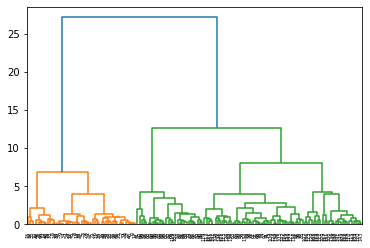

In [33]:
x=StandardScaler().fit_transform(x)
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
dendrogram=dendrogram(linkage(x,method='ward'))
clf=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
clf.fit(x)


In [34]:
labels=clf.labels_
x1['anomly']=labels
outliers=x1.loc[x1['anomly']==1]
outlier_index=list(outliers.index)
print(x1['anomly'].value_counts())

0    101
1     49
Name: anomly, dtype: int64


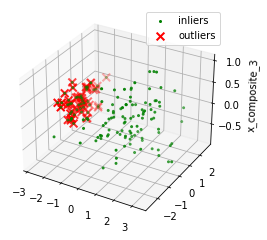

In [45]:
# plot result
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca=PCA(n_components=3) # reduce to 3 dimesions
scaler=StandardScaler()
#normalize the metrics
x=scaler.fit_transform(x)
x_reduce=pca.fit_transform(x)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_zlabel("x_composite_3") #plot the compressed datatype
ax.scatter(x_reduce[:,0],x_reduce[:,1],zs=x_reduce[:,2],s=4,lw=1,label='inliers',c='green')
ax.scatter(x_reduce[outlier_index,0],x_reduce[outlier_index,1],x_reduce[outlier_index,2],lw=2,s=60,marker='x',c='red',label='outliers')
ax.legend()
ax
plt.show()